In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from arch import arch_model

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


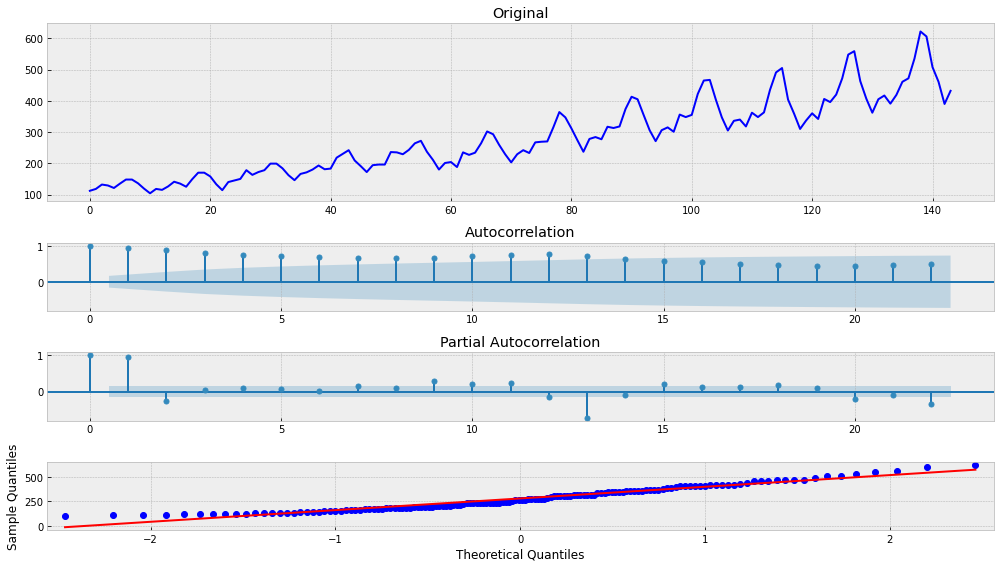

In [8]:
series = pd.read_csv("Series/international-airline-passengers.csv")["Count"]
# series = boxcox(series, 0)
# series = np.diff(series, 1)
# series = np.diff(series, 1)
tsplot(series)

In [9]:
def _get_best_model(ts):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(ts, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return best_aic, best_order, best_mdl

aic, order, mdl = _get_best_model(series)

/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This proble

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49006D+00    |proj g|=  1.66969D-02

At iterate    5    f=  6.48032D+00    |proj g|=  2.13873D-04

At iterate   10    f=  6.48023D+00    |proj g|=  7.10543D-06

At iterate   15    f=  6.48022D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1     16     17      1     0     0   0.000D+00   6.480D+00
  F =   6.4802236550090146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88760D+00    |proj g|=  7.79732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      7      1     0     0   0.000D+00   4.888D+00
  F =   4.8875966462640124     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.81440D+00    |proj g|=  1.78675D-03

At iterate   10    f=  4.81431D+00    |proj g|=  1.41220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   8.882D-08   4.814D+00
  F =   4.8143060791251315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96538D+00    |proj g|=  2.76367D-01

At iterate    5    f=  4.78997D+00    |proj g|=  4.09589D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01490D+00    |proj g|=  2.14496D-01

At iterate    5    f=  4.90116D+00    |proj g|=  4.19753D-03

At iterate   10    f=  4.90087D+00    |proj g|=  3.19744D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     12      1     0     0   0.000D+00   4.901D+00
  F =   4.9008665076982858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.83105D+00    |proj g|=  1.50990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   1.510D-06   4.831D+00
  F =   4.8310530879492894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10973D+00    |proj g|=  2.95960D-01

At iterate    5    f=  4.80809D+00    |proj g|=  2.89739D-02

At iterate   10    f=  4.78092D+00    |proj g|=  6.44098D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.79155D+00    |proj g|=  3.40608D-03

At iterate   10    f=  4.79139D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     11      1     0     0   0.000D+00   4.791D+00
  F =   4.7913916936832983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12900D+00    |proj g|=  3.65620D-01

At iterate    5    f=  4.83666D+00    |proj g|=  3.69297D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     79      1     0     0   4.370D-05   4.696D+00
  F =   4.6964183733759199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02261D+00    |proj g|=  3.41701D-01

At iterate    5    f=  4.80616D+00    |proj g|=  4.12602D-02

At iterate   10    f=  4.77969D+00    |proj g|=  6.10457D-02

At iterate   15    f=  4.68941D+00    |proj g|=  1.55046D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  4.75063D+00    |proj g|=  3.33058D-02

At iterate   15    f=  4.70348D+00    |proj g|=  1.23033D-01

At iterate   20    f=  4.68899D+00    |proj g|=  2.92125D-02

At iterate   25    f=  4.68700D+00    |proj g|=  4.83702D-04

At iterate   30    f=  4.68700D+00    |proj g|=  4.98801D-04

At iterate   35    f=  4.68700D+00    |proj g|=  5.39746D-04

At iterate   40    f=  4.68700D+00    |proj g|=  4.89475D-04

At iterate   45    f=  4.68700D+00    |proj g|=  2.70273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     67      1     0     0   1.643D-05   4.687D+00
  F =   4.68699614316


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04964D+00    |proj g|=  5.32365D-03

At iterate    5    f=  5.04957D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   0.000D+00   5.050D+00
  F =   5.0495697316665353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 v


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99797D+00    |proj g|=  2.01006D-01

At iterate    5    f=  4.87888D+00    |proj g|=  1.28321D-02

At iterate   10    f=  4.87684D+00    |proj g|=  2.91323D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.776D-07   4.877D+00
  F =   4.8768353847038224     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.78886D+00    |proj g|=  3.99680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   1.776D-07   4.789D+00
  F =   4.7888601408038589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07817D+00    |proj g|=  3.95843D-01

At iterate    5    f=  4.81641D+00    |proj g|=  5.48119D-02

At iterate   10    f=  4.79128D+00    |proj g|=  1.74127D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  4.68230D+00    |proj g|=  1.97176D-05

At iterate   50    f=  4.68230D+00    |proj g|=  2.84217D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    107      2     0     0   2.842D-06   4.682D+00
  F =   4.6823031359247231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05353D+00    |proj g|=  3.87780D-01

At iterate    5    f=  4.80838D+00    |proj g|=  4.88575D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.98854D+00    |proj g|=  3.23580D-01

At iterate    5    f=  4.76812D+00    |proj g|=  1.82034D-02

At iterate   10    f=  4.74123D+00    |proj g|=  3.39455D-02

At iterate   15    f=  4.70689D+00    |proj g|=  2.31922D-02

At iterate   20    f=  4.69851D+00    |proj g|=  2.65629D-02

At iterate   25    f=  4.68810D+00    |proj g|=  7.88747D-03

At iterate   30    f=  4.68739D+00    |proj g|=  5.18963D-03

At iterate   35    f=  4.68697D+00    |proj g|=  2.75966D-03

At iterate   40    f=  4.68692D+00    |proj g|=  2.43565D-03

At iterate   45    f=  4.68691D+00    |proj g|=  2.10587D-04

At iterate   50    f=  4.68691D+00    |proj g|=  3.40172D-05

At iterate   55    f=  4.68691D+00    |proj g|=  1.64313D-05
  ys=-5.218E-11  -gs= 2.446E-11 BFGS update SKIPPED

At iterate   60    f=  4.68691D+00  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.87454D+00    |proj g|=  8.42029D-03

At iterate   15    f=  4.81112D+00    |proj g|=  5.98418D-02

At iterate   20    f=  4.76083D+00    |proj g|=  4.69669D-04

At iterate   25    f=  4.76083D+00    |proj g|=  5.32019D-05

At iterate   30    f=  4.76083D+00    |proj g|=  1.43796D-04

At iterate   35    f=  4.76083D+00    |proj g|=  1.06670D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

  ys=-1.703E-16  -gs= 1.175E-16 BFGS update SKIPPED

At iterate   40    f=  4.76083D+00    |proj g|=  9.84102D-05
  ys=-2.896E-12  -gs= 4.352E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43    229      6     2     0   1.702D-04   4.761D+00
  F =   4.7608263130882529     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97099D+00    |proj g|=  1.74214D-01

At iterate    5    f=  4.86

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81963D+00    |proj g|=  1.18845D-02

At iterate    5    f=  4.81894D+00    |proj g|=  1.03739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   1.776D-07   4.819D+00
  F =   4.8189394399808867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 v

 This problem is unconstrained.
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99874D+00    |proj g|=  3.23965D-01

At iterate    5    f=  4.78450D+00    |proj g|=  1.64818D-02

At iterate   10    f=  4.77461D+00    |proj g|=  5.22833D-02

At iterate   15    f=  4.75506D+00    |proj g|=  1.35615D-02

At iterate   20    f=  4.75413D+00    |proj g|=  1.36939D-03

At iterate   25    f=  4.75215D+00    |proj g|=  1.92168D-02

At iterate   30    f=  4.73982D+00    |proj g|=  2.35577D-02

At iterate   35    f=  4.73191D+00    |proj g|=  2.60811D-02

At iterate   40    f=  4.72018D+00    |proj g|=  1.35916D-02

At iterate   45    f=  4.71969D+00    |proj g|=  1.72999D-03

At iterate   50    f=  4.71967D+00    |proj g|=  4.22773D-05

At iterate   55    f=  4.71967D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  4.72779D+00    |proj g|=  8.07443D-02

At iterate   25    f=  4.69459D+00    |proj g|=  3.27902D-02

At iterate   30    f=  4.68615D+00    |proj g|=  3.02963D-02

At iterate   35    f=  4.68013D+00    |proj g|=  6.15945D-02

At iterate   40    f=  4.67246D+00    |proj g|=  1.90666D-02

At iterate   45    f=  4.67123D+00    |proj g|=  2.84617D-03

At iterate   50    f=  4.67067D+00    |proj g|=  1.15955D-02

At iterate   55    f=  4.67050D+00    |proj g|=  2.06333D-03

At iterate   60    f=  4.67048D+00    |proj g|=  3.22764D-04

At iterate   65    f=  4.67048D+00    |proj g|=  2.72493D-04

At iterate   70    f=  4.67048D+00    |proj g|=  1.98064D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     45      1     0     0   4.441D-07   4.814D+00
  F =   4.8144035509139700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15070D+00    |proj g|=  4.17571D-01

At iterate    5    f=  4.85178D+00    |proj g|=  1.72085D-02

At iterate   10    f=  4.81870D+00    |proj g|=  1.35970D-01

At iterate   15    f=  4.70352D+00    |proj g|=  3.75378D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  4.67519D+00    |proj g|=  5.17459D-02

At iterate   35    f=  4.67483D+00    |proj g|=  2.42159D-02
  ys=-2.488E-04  -gs= 8.464E-05 BFGS update SKIPPED

At iterate   40    f=  4.67466D+00    |proj g|=  3.98206D-03

At iterate   45    f=  4.67465D+00    |proj g|=  2.58433D-03

At iterate   50    f=  4.67464D+00    |proj g|=  6.28511D-03

At iterate   55    f=  4.67455D+00    |proj g|=  1.30060D-02

At iterate   60    f=  4.67386D+00    |proj g|=  2.51399D-02

At iterate   65    f=  4.67358D+00    |proj g|=  8.49951D-03

At iterate   70    f=  4.67356D+00    |proj g|=  3.65254D-03

At iterate   75    f=  4.67355D+00    |proj g|=  3.02069D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Results of Dickey-Fuller Test:
Test Statistic                  -5.229605
p-value                          0.000008
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


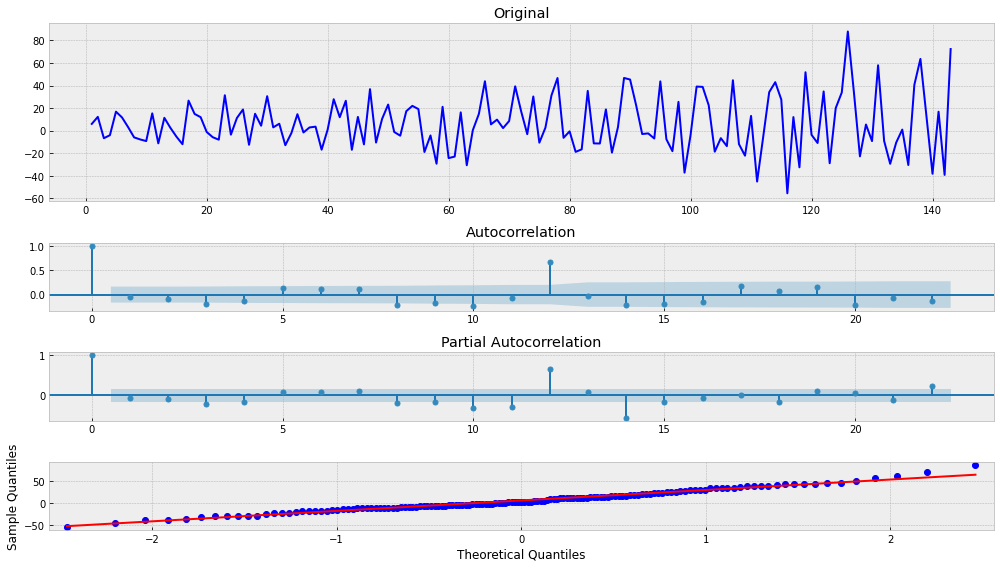

In [10]:
tsplot(mdl.resid)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


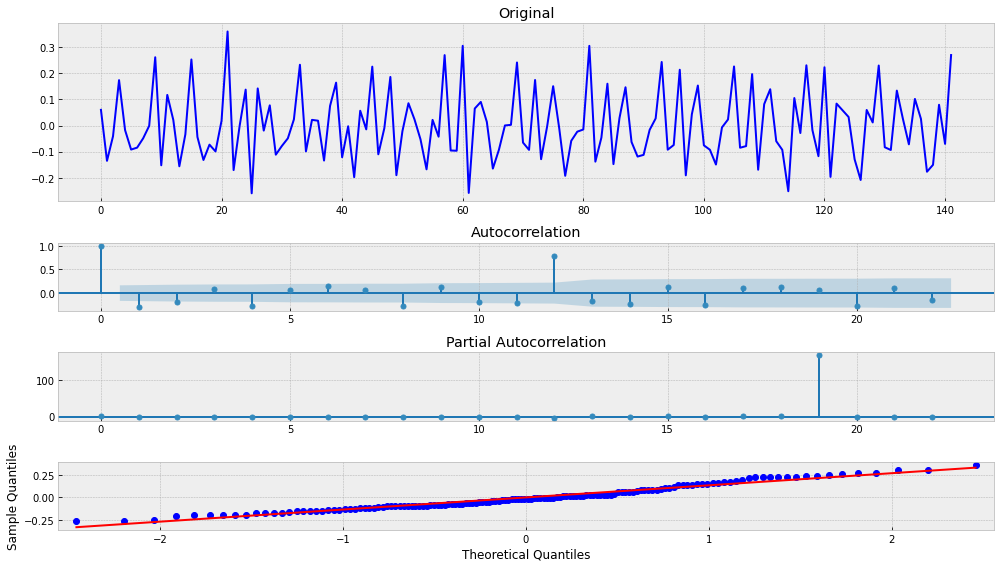

In [11]:
series = boxcox(series, 0)
series = np.diff(series, 1)
series = np.diff(series, 1)
tsplot(series)

In [12]:
order

(3, 1, 3)

In [15]:
# Now we can fit the arch model using the best fit arima model parameters
p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
am = arch_model(series, p=p_, o=o_, q=q_, dist='studentst')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     66,   Neg. LLF: -82.99291348865053
Iteration:     10,   Func. Count:    126,   Neg. LLF: 266.74260315907355
Iteration:     15,   Func. Count:    183,   Neg. LLF: -98.85127685916723
Iteration:     20,   Func. Count:    240,   Neg. LLF: -98.98888224248223
Iteration:     25,   Func. Count:    295,   Neg. LLF: -99.73264208961959
Iteration:     30,   Func. Count:    350,   Neg. LLF: -100.10465224033392
Iteration:     35,   Func. Count:    415,   Neg. LLF: -100.19505560859977
Iteration:     40,   Func. Count:    483,   Neg. LLF: -100.19553998420439
Optimization terminated successfully    (Exit mode 0)
            Current function value: -100.19554124231573
            Iterations: 43
            Function evaluations: 505
            Gradient evaluations: 42
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   C

/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0181. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/antonpavlovskyi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


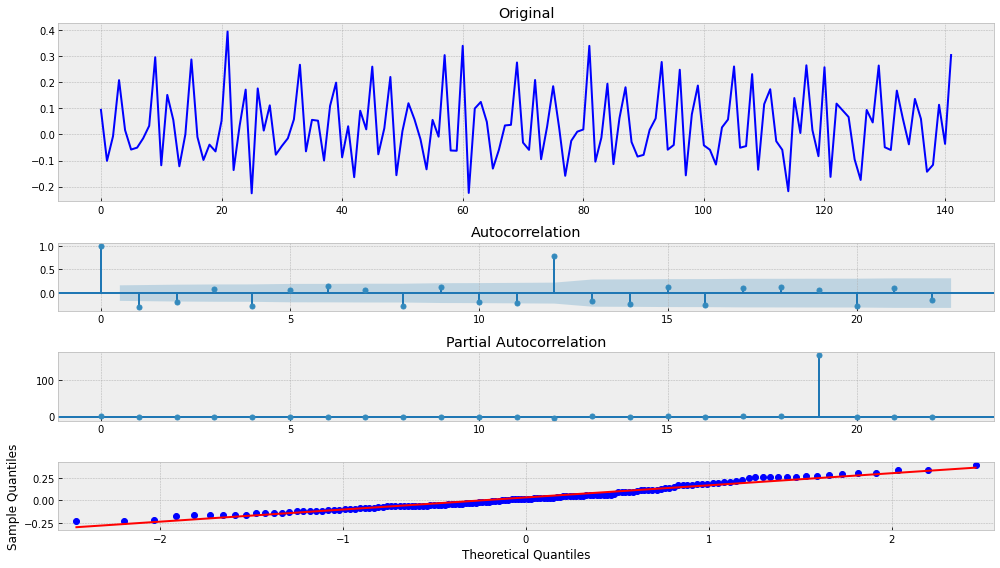

In [16]:
tsplot(res.resid)